# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import choice
import statistics

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [2]:
# This is a conditional probability problem:
# P(A|B) = P(B|A)*P(A)
#          -----------
#              P(B)

ss = ["b1", "b2"]
p_A1 = ss.count("b1")/len(ss)
p_A1

0.5

Since there are 2 bowls, the probability of choosing bowl 1 is 50%

In [3]:
cookies = 30 + 10 + 20 + 20
vanilla = 30 + 20

p_Bv = vanilla/cookies
p_Bv

0.625

This is the probability of choosing a vanilla cookie

In [4]:
b1 = 30 + 10

p_Bv_A1 = 30/b1
p_Bv_A1

0.75

There are 40 cookies in total in bowl 1 and 30 are vanilla cokies, so the probability of choosing a vanilla cookie from b1 is 30/40

In [5]:
p_A1_Bv = (p_Bv_A1 * p_A1)/p_Bv
p_A1_Bv

0.6

#### What is the probability that it came from Bowl 2?

In [6]:
p_A2 = ss.count("b2")/len(ss)
p_A2

0.5

In [7]:
b2 = 20 + 20

p_Bv_A2 = 20/b1
p_Bv_A2

0.5

In [8]:
p_A2_Bv = (p_Bv_A2 * p_A2)/p_Bv
p_A2_Bv

0.4

#### What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [9]:
cookies = 30 + 10 + 20 + 20
choco = 10 + 20

p_Bc = choco/cookies
p_Bc

0.375

In [10]:
b1 = 30 + 10

p_Bc_A1 = 10/b1
p_A1_Bc = (p_Bc_A1 * p_A1)/p_Bc
p_A1_Bc

0.3333333333333333

bowl 1 choco

In [11]:
b2 = 20 + 20

p_Bc_A2 = 20/b1
p_A2_Bc = (p_Bc_A2 * p_A2)/p_Bc
p_A2_Bc

0.6666666666666666

bowl 2 choco

## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [12]:
ss = ["b1", "b2"]
p_A1 = ss.count("b1")/len(ss)       #prob of choosing bag 1
p_A1

0.5

In [13]:
p_A2 = ss.count("b2")/len(ss)       #prob of choosing bag 2
p_A2

0.5

In [14]:
p_B_A1 = 0.2*0.2                 #prob of getting a yellow and green candy from bag 1
p_B_A1

0.04000000000000001

In [15]:
p_B_A2 = 0.1*0.14                 #prob of getting a yellow and green candy from bag 2
p_B_A2

0.014000000000000002

In [16]:
p_A1_B_A1 = p_B_A1 * p_A1
p_A1_B_A1

0.020000000000000004

In [17]:
p_A2_B_A2 = p_B_A2 * p_A2
p_A2_B_A2

0.007000000000000001

In [18]:
norm = p_A1_B_A1 + p_A2_B_A2
norm

0.027000000000000003

In [19]:
p_A1_B = p_A1_B_A1/norm
p_A1_B

0.7407407407407408

#### What is the probability that the yellow candy came from Bag 2?

In [20]:
p_A2_B = p_A2_B_A2/norm
p_A2_B

0.25925925925925924

#### What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [21]:
p_A1_B = p_A2_B_A2/norm
p_A1_B

0.25925925925925924

In [22]:
p_A2_B = p_A1_B_A1/norm
p_A2_B

0.7407407407407408

## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [23]:
doors = ["A","B","C"]

In [24]:
p_BA = 1/2
p_A = 1/3
p_B = 1/2
p_AB = (p_BA * p_A)/p_B 
p_AB

0.3333333333333333

If I were to choose Door A and keep it, being the car behind A, the probability would be 33%

In [25]:
p_BA = 1
p_A = 1/3
p_B = 1/2
p_AB = (p_BA * p_A)/p_B 
p_AB

0.6666666666666666

If I were to choose Door A, being the car behind Door C, and then change my option, my chances of getting the car would be 66%

## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

#### Produce a set of descriptive statistics for the posterior distribution.

In [26]:
prior = np.random.uniform(0,1,10000)

(array([1017.,  936., 1061.,  970., 1002., 1009., 1006.,  969., 1019.,
        1011.]),
 array([6.12573747e-05, 1.00045628e-01, 2.00029999e-01, 3.00014370e-01,
        3.99998740e-01, 4.99983111e-01, 5.99967482e-01, 6.99951853e-01,
        7.99936223e-01, 8.99920594e-01, 9.99904965e-01]),
 <BarContainer object of 10 artists>)

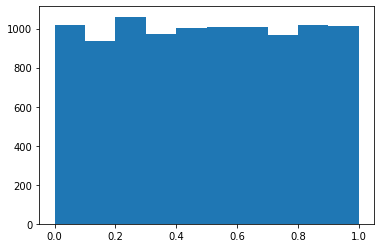

In [27]:
plt.hist(prior)

Uniform distribution probability

In [28]:
def generative_model(n_visits, probability):
    return np.random.binomial(n_visits, probability)

In [29]:
generative_model(100, 7/50)

17

In [30]:
simulation = []

for prob in prior:
    simulation.append(generative_model(100,prob))

(array([ 992.,  987.,  972.,  998.,  992.,  994.,  982.,  980., 1010.,
        1093.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

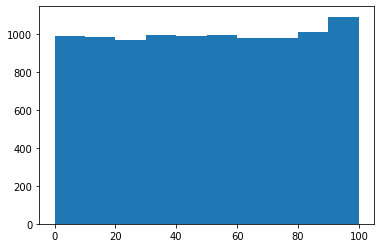

In [31]:
plt.hist(simulation)

Uniform distribution probability

In [32]:
truth = 14
posteriori = []

for n_vis in simulation:
    posteriori.append(n_vis == truth)

In [33]:
post = [prob for prob, res in zip(prior,posteriori) if res]

(array([ 6.,  5., 14., 18., 15., 14., 11.,  6.,  4.,  2.]),
 array([0.06690604, 0.08440893, 0.10191183, 0.11941472, 0.13691761,
        0.15442051, 0.1719234 , 0.1894263 , 0.20692919, 0.22443209,
        0.24193498]),
 <BarContainer object of 10 artists>)

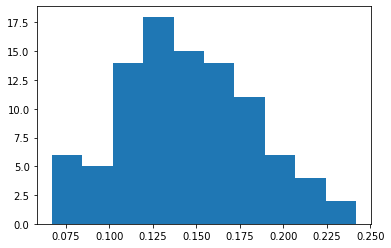

In [34]:
plt.hist(post)

Normal distribution (not uniform)

In [35]:
len(post)

95

In [36]:
df = pd.DataFrame(post)

In [37]:
df.describe()

,0
count,95.000000
mean,0.144359
std,0.037935
min,0.066906
25%,0.117782
50%,0.146215
75%,0.166539
max,0.241935


STD is pretty small

#### What is the 90% credible interval range?

In [38]:
mean = df.describe().loc["mean",0]

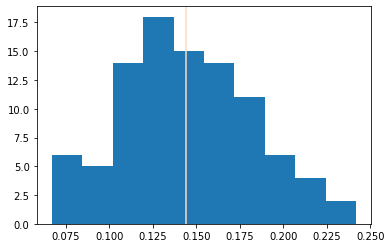

In [39]:
plt.hist(post)
plt.axvline(mean, color="peachpuff")

In [40]:
# CSS color names --> to search colors in matplotlib

In [ ]:
post.quantile(.05),post.quantile(.95)

What is the Maximum Likelihood Estimate?